In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [106]:
df.shape

(200, 4)

In [107]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [108]:
df.duplicated().sum()

np.int64(0)

In [109]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [110]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)

In [112]:
X_train.shape, X_test.shape

((160, 3), (40, 3))

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Using Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))
print(rmse)

2.7051294230814142
1.1984678961500133
1.6447277656443373


In [116]:
print(r2_score(y_train, y_pred_train))

0.8957008271017817


In [117]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(rmse)

3.1740973539761073
1.4607567168117601
1.781599661533451


In [118]:
print(r2_score(y_test, y_pred))


0.8994380241009119


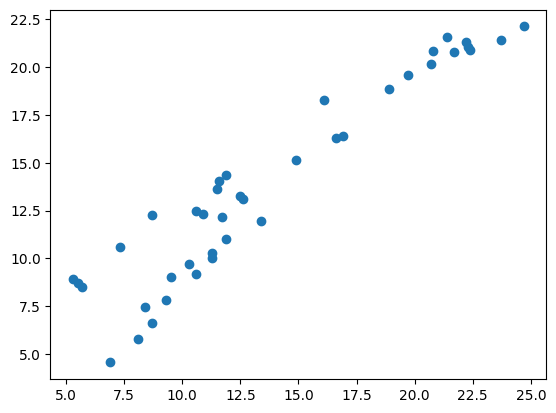

In [119]:
plt.scatter(y_test, y_pred)

## Using Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))
print(rmse)

0.09492438124999994
0.23033124999999988
0.30809800591694836


In [122]:
print(r2_score(y_train, y_pred_train))

0.996340088437997


In [123]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(rmse)

0.5910253749999989
0.6207249999999989
0.7687817473119395


In [124]:
print(r2_score(y_test, y_pred))

0.9812750924472915


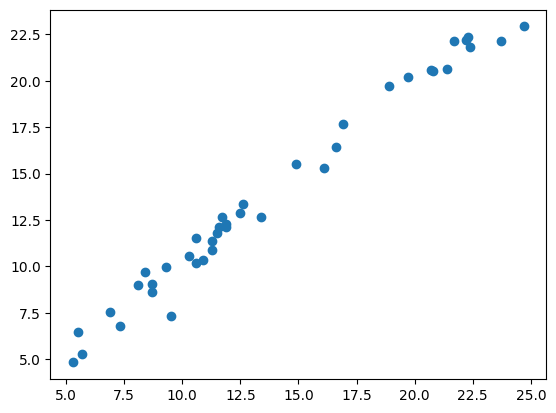

In [125]:
plt.scatter(y_test, y_pred)
